# Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

# Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

---

In [41]:
seed = 7

In [42]:
# Import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('./data/train_cleaned3.csv')
valid_data = pd.read_csv('./data/test_cleaned3.csv')

In [43]:
# Concatenate train and valid data in order to clean them together
train_data = train_data.append(valid_data, ignore_index=True)

C:\Users\shahr\AppData\Local\Temp\ipykernel_16436\4223729738.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(valid_data, ignore_index=True)


---

# Cleaning datas

## Band informations cleaning

### Filling missing values

In [44]:
train_data = train_data.replace({'Insert Band Name':np.nan, 'Insert Band Genre':np.nan, 'Insert Band Country of Origin':np.nan})

In [45]:
train_data['Band Name'] = train_data['Band Name'].astype('category')
train_data['Band Name'].fillna(train_data.groupby(['Band Genre', 'Band Country of Origin', 'Band Debut'])['Band Name'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Band Name'].fillna(train_data.groupby(['Concert ID'])['Band Name'].transform(lambda x: x.value_counts().index[0]), inplace=True)

In [46]:
train_data['Band Genre'].fillna(train_data.groupby(['Band Name'])['Band Genre'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Band Country of Origin'].fillna(train_data.groupby(['Band Name'])['Band Country of Origin'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Band Debut'].fillna(train_data.groupby(['Band Name'])['Band Debut'].transform(lambda x: x.value_counts().index[0]), inplace=True)

train_data['Band Genre'].fillna(train_data.groupby(['Band Country of Origin', 'Band Debut'])['Band Genre'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Band Country of Origin'].fillna(train_data.groupby(['Band Genre', 'Band Debut'])['Band Country of Origin'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Band Debut'].fillna(train_data.groupby(['Band Genre', 'Band Country of Origin'])['Band Debut'].transform(lambda x: x.value_counts().index[0]), inplace=True)

### Replacing wrong values by most frequent value

In [47]:
train_data['Band Genre'] = train_data.groupby(['Band Name'])['Band Genre'].transform(lambda x: x.value_counts().index[0])
train_data['Band Country of Origin'] = train_data.groupby(['Band Name'])['Band Country of Origin'].transform(lambda x: x.value_counts().index[0])
train_data['Band Debut'] = train_data.groupby(['Band Name'])['Band Debut'].transform(lambda x: x.value_counts().index[0])

## Goers information cleaning

### Filling missing values

In [48]:
# Convert Concert Goer ID to category
train_data['Concert Goer ID'] = train_data['Concert Goer ID'].astype('category')
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)

train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)

train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 2', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 2', 'Personnality Trait 3', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)

train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 3', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 3', 'Personnality Trait 4', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)', ])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)

train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Concert Goer Age', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 4', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 4', 'Concert Goer Age', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)

train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Height (cm)', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age', 'Height (cm)'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)

train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Country of Origin'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Height (cm)'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)

train_data['Concert Goer ID'].fillna(train_data.groupby(['Personnality Trait 1', 'Personnality Trait 2', 'Personnality Trait 3', 'Personnality Trait 4', 'Concert Goer Age'])['Concert Goer ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)


### Replacing wrong values by most frequent value

In [49]:
train_data['Personnality Trait 1'] = train_data['Personnality Trait 1'].fillna(train_data.groupby(['Concert Goer ID'])['Personnality Trait 1'].transform(lambda x: x.value_counts().index[0]))
train_data['Personnality Trait 2'] = train_data['Personnality Trait 2'].fillna(train_data.groupby(['Concert Goer ID'])['Personnality Trait 2'].transform(lambda x: x.value_counts().index[0]))
train_data['Personnality Trait 3'] = train_data['Personnality Trait 3'].fillna(train_data.groupby(['Concert Goer ID'])['Personnality Trait 3'].transform(lambda x: x.value_counts().index[0]))
train_data['Personnality Trait 4'] = train_data['Personnality Trait 4'].fillna(train_data.groupby(['Concert Goer ID'])['Personnality Trait 4'].transform(lambda x: x.value_counts().index[0]))
train_data['Concert Goer Age'] = train_data['Concert Goer Age'].fillna(train_data.groupby(['Concert Goer ID'])['Concert Goer Age'].transform(lambda x: x.value_counts().index[0]))
train_data['Height (cm)'] = train_data['Height (cm)'].fillna(train_data.groupby(['Concert Goer ID'])['Height (cm)'].transform(lambda x: x.value_counts().index[0]))
train_data['Concert Goer Country of Origin'] = train_data['Concert Goer Country of Origin'].fillna(train_data.groupby(['Concert Goer ID'])['Concert Goer Country of Origin'].transform(lambda x: x.value_counts().index[0]))

In [50]:
train_data['Personnality Trait 1'] = train_data.groupby(['Concert Goer ID'])['Personnality Trait 1'].transform(lambda x: x.value_counts().index[0])
train_data['Personnality Trait 2'] = train_data.groupby(['Concert Goer ID'])['Personnality Trait 2'].transform(lambda x: x.value_counts().index[0])
train_data['Personnality Trait 3'] = train_data.groupby(['Concert Goer ID'])['Personnality Trait 3'].transform(lambda x: x.value_counts().index[0])
train_data['Personnality Trait 4'] = train_data.groupby(['Concert Goer ID'])['Personnality Trait 4'].transform(lambda x: x.value_counts().index[0])
train_data['Concert Goer Age'] = train_data.groupby(['Concert Goer ID'])['Concert Goer Age'].transform(lambda x: x.value_counts().index[0])
train_data['Height (cm)'] = train_data.groupby(['Concert Goer ID'])['Height (cm)'].transform(lambda x: x.value_counts().index[0])
train_data['Concert Goer Country of Origin'] = train_data.groupby(['Concert Goer ID'])['Concert Goer Country of Origin'].transform(lambda x: x.value_counts().index[0])

## Concert ID cleaning

### Filling missing values

In [51]:
train_data['Concert ID'].fillna(train_data.groupby(['Band Name'])['Concert ID'].transform(lambda x: x.value_counts().index[0]), inplace=True)

In [52]:
train_data['Concert Attendance'].fillna(train_data.groupby(['Concert ID'])['Concert Attendance'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Inside Venue'].fillna(train_data.groupby(['Concert ID'])['Inside Venue'].transform(lambda x: x.value_counts().index[0]), inplace=True)
train_data['Rain'].fillna(train_data.groupby(['Concert ID'])['Rain'].transform(lambda x: x.value_counts().index[0]), inplace=True)

### Replacing wrong values by most frequent value

In [53]:
train_data['Concert Attendance'] = train_data.groupby(['Concert ID'])['Concert Attendance'].transform(lambda x: x.value_counts().index[0])
train_data['Inside Venue'] = train_data.groupby(['Concert ID'])['Inside Venue'].transform(lambda x: x.value_counts().index[0])
train_data['Rain'] = train_data.groupby(['Concert ID'])['Rain'].transform(lambda x: x.value_counts().index[0])

## Reseparing train data and test data

In [54]:
# Separate train_data from valid_data 
valid_data = train_data.iloc[170000:]
train_data = train_data.iloc[:170000]

valid_data = valid_data.drop(['Concert Enjoyment'], axis=1)

---

# Preprocessing

In [55]:
# Replace "Concert Enjoyment column" with numerical values
train_data['Concert Enjoyment'] = train_data['Concert Enjoyment'].replace(['Worst Concert Ever', 'Did Not Enjoy', 'Enjoyed', 'Best Concert Ever'], [0, 1, 2, 3])

# Remove 'concer_goer_' before all Concer Goer ID and transform it into integer
train_data['Concert Goer ID'] = train_data['Concert Goer ID'].str.replace('concert_goer_', '')
train_data['Concert Goer ID'] = train_data['Concert Goer ID'].astype(int)

valid_data['Concert Goer ID'] = valid_data['Concert Goer ID'].str.replace('concert_goer_', '')
valid_data['Concert Goer ID'] = valid_data['Concert Goer ID'].astype(int)

# Fill nan value of "Seated" with random value
train_data['Seated'] = train_data['Seated'].fillna(np.random.choice([0, 1], p=[0.5, 0.5]))
valid_data['Seated'] = valid_data['Seated'].fillna(np.random.choice([0, 1], p=[0.5, 0.5]))

train_data['Seated'] = train_data['Seated'].astype(int)
valid_data['Seated'] = valid_data['Seated'].astype(int)

# Drop Id column
train_data.drop('Id', axis=1, inplace=True)
valid_data.drop('Id', axis=1, inplace=True)

## Feature Engineering

In [56]:
def add_rating(df, train_data, category):
    rate = train_data.groupby([category]).agg({'Concert Enjoyment': 'mean'})
    df[category + ' Rating'] = df[category].map(rate['Concert Enjoyment']).astype(float)
    return df

In [57]:
train_data = add_rating(train_data, train_data, 'Band Name')
train_data = add_rating(train_data, train_data, 'Concert ID')

valid_data = add_rating(valid_data, train_data, 'Band Name')
valid_data = add_rating(valid_data, train_data, 'Concert ID')

## One Hot Encoding

In [58]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_data[['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"]]))

def OneHot(df):

    # Apply ont hot ender to each column with categorical data
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df[['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"]]))

    # One hot encoding removed index; put it back; let the band name be the header without the name of the category
    OH_cols_train.index = df.index
    OH_cols_train.columns = OH_encoder.get_feature_names_out(['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"])
    # Modify all the column names to remove the 'Band Name', 'Band Genre', 'Band Country of Origin' and 'Concert Goer Country of Origin' from the name
    OH_cols_train.columns = OH_cols_train.columns.str.replace('Band Name_', '')
    OH_cols_train.columns = OH_cols_train.columns.str.replace('Band Genre_', '')
    OH_cols_train.columns = OH_cols_train.columns.str.replace('Band Country of Origin_', '')
    OH_cols_train.columns = OH_cols_train.columns.str.replace('Concert Goer Country of Origin_', '')

    # Remove categorical columns (will replace with one-hot encoding)
    numeric_train_data = df.drop(['Band Name', 'Band Genre', 'Band Country of Origin', "Concert Goer Country of Origin"], axis=1)

    # Add one-hot encoded columns to numerical features but let the name of the band as header
    df = pd.concat([OH_cols_train,numeric_train_data], axis=1)

    return df

In [59]:
train_data = OneHot(train_data)
valid_data = OneHot(valid_data)

In [155]:
X = train_data.drop(['Concert Enjoyment'], axis=1)
y = train_data['Concert Enjoyment']

## Normalization

In [61]:
def musigma_normalize(df):
    df['Band Debut'] = (df['Band Debut'] - df['Band Debut'].mean()) / df['Band Debut'].std()
    df['Concert ID'] = (df['Concert ID'] - df['Concert ID'].mean()) / df['Concert ID'].std()
    df['Concert Attendance'] = (df['Concert Attendance'] - df['Concert Attendance'].mean()) / df['Concert Attendance'].std()
    df['Personnality Trait 1'] = (df['Personnality Trait 1'] - df['Personnality Trait 1'].mean()) / df['Personnality Trait 1'].std()
    df['Personnality Trait 2'] = (df['Personnality Trait 2'] - df['Personnality Trait 2'].mean()) / df['Personnality Trait 2'].std()
    df['Personnality Trait 3'] = (df['Personnality Trait 3'] - df['Personnality Trait 3'].mean()) / df['Personnality Trait 3'].std()
    df['Personnality Trait 4'] = (df['Personnality Trait 4'] - df['Personnality Trait 4'].mean()) / df['Personnality Trait 4'].std()
    df['Concert Goer Age'] = (df['Concert Goer Age'] - df['Concert Goer Age'].mean()) / df['Concert Goer Age'].std()
    df['Height (cm)'] = (df['Height (cm)'] - df['Height (cm)'].mean()) / df['Height (cm)'].std()
    df['Concert Goer ID'] = (df['Concert Goer ID'] - df['Concert Goer ID'].mean()) / df['Concert Goer ID'].std()
    df['Concert ID Rating'] = (df['Concert ID Rating'] - df['Concert ID Rating'].mean()) / df['Concert ID Rating'].std()
    df['Band Name Rating'] = (df['Band Name Rating'] - df['Band Name Rating'].mean()) / df['Band Name Rating'].std()
    return df

In [138]:
def minmax_normalize(df):
    df['Band Debut'] = (df['Band Debut'] - df['Band Debut'].min()) / (df['Band Debut'].max() - df['Band Debut'].min())
    df['Concert ID'] = (df['Concert ID'] - df['Concert ID'].min()) / (df['Concert ID'].max() - df['Concert ID'].min())
    df['Concert Attendance'] = (df['Concert Attendance'] - df['Concert Attendance'].min()) / (df['Concert Attendance'].max() - df['Concert Attendance'].min())
    df['Personnality Trait 1'] = (df['Personnality Trait 1'] - df['Personnality Trait 1'].min()) / (df['Personnality Trait 1'].max() - df['Personnality Trait 1'].min())
    df['Personnality Trait 2'] = (df['Personnality Trait 2'] - df['Personnality Trait 2'].min()) / (df['Personnality Trait 2'].max() - df['Personnality Trait 2'].min())
    df['Personnality Trait 3'] = (df['Personnality Trait 3'] - df['Personnality Trait 3'].min()) / (df['Personnality Trait 3'].max() - df['Personnality Trait 3'].min())
    df['Personnality Trait 4'] = (df['Personnality Trait 4'] - df['Personnality Trait 4'].min()) / (df['Personnality Trait 4'].max() - df['Personnality Trait 4'].min())
    df['Concert Goer Age'] = (df['Concert Goer Age'] - df['Concert Goer Age'].min()) / (df['Concert Goer Age'].max() - df['Concert Goer Age'].min())
    df['Height (cm)'] = (df['Height (cm)'] - df['Height (cm)'].min()) / (df['Height (cm)'].max() - df['Height (cm)'].min())
    df['Concert ID Rating'] = (df['Concert ID Rating'] - df['Concert ID Rating'].min()) / (df['Concert ID Rating'].max() - df['Concert ID Rating'].min())
    df['Band Name Rating'] = (df['Band Name Rating'] - df['Band Name Rating'].min()) / (df['Band Name Rating'].max() - df['Band Name Rating'].min())
    return df

---

In [156]:
X = musigma_normalize(X)
X_valid = musigma_normalize(valid_data)

In [157]:
X = X.to_numpy()
y = y.to_numpy()

In [158]:
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# Process test data
val_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state=seed)

---

# Processing

## First predictions

In [79]:
first_predictions = pd.DataFrame()

### Logistic Regression

In [67]:
clf_lg = LogisticRegression(solver='lbfgs', penalty='l2', C=0.01, max_iter=1000, random_state=seed)
clf_lg.fit(X_train, y_train)
pred_lg = clf_lg.predict(X_test)
f1_score(y_test, pred_lg, average='micro')

0.6303823529411765

In [80]:
if f1_score(y_test, pred_lg, average='micro') > 0.62:
    # Concatenate with first_prediction
    pred_lg = pd.DataFrame(pred_lg)
    pred_lg.columns = ['Logistic Regression']
    first_predictions = pd.concat([first_predictions, pd.DataFrame(pred_lg)], axis=1)

### KNN

In [77]:
clf_knn = KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1)
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)
f1_score(y_test, pred_knn, average='micro')

0.6310882352941176

In [81]:
if f1_score(y_test, pred_knn, average='micro') > 0.62:
    # Concatenate with first_prediction
    pred_knn = pd.DataFrame(pred_knn)
    pred_knn.columns = ['KNN']
    first_predictions = pd.concat([first_predictions, pd.DataFrame(pred_knn)], axis=1)

### Random Forest

In [82]:
clf_rd = RandomForestClassifier(n_estimators=1000, max_depth=30, n_jobs=-1, random_state=seed)
clf_rd.fit(X_train, y_train)
pred_rd = clf_rd.predict(X_test)
f1_score(y_test, pred_rd, average='micro')

0.659

In [83]:
if f1_score(y_test, pred_rd, average='micro') > 0.62:
    # Concatenate with first_prediction
    pred_rd = pd.DataFrame(pred_rd)
    pred_rd.columns = ['Random Forest']
    first_predictions = pd.concat([first_predictions, pd.DataFrame(pred_rd)], axis=1)

### Bagging

In [84]:
clf_bagg = BaggingClassifier(n_estimators=500, max_samples=0.5, max_features=0.5, n_jobs=-1, random_state=seed)
clf_bagg.fit(X_train, y_train)
pred_bagg = clf_bagg.predict(X_test)
f1_score(y_test, pred_bagg, average='micro')

0.6527647058823529

In [85]:
if f1_score(y_test, pred_bagg, average='micro') > 0.62:
    # Concatenate with first_prediction
    pred_bagg = pd.DataFrame(pred_bagg)
    pred_bagg.columns = ['Bagging']
    first_predictions = pd.concat([first_predictions, pd.DataFrame(pred_bagg)], axis=1)

### Gradient Boosting

In [86]:
clf_gb = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=seed)
clf_gb.fit(X_train, y_train)
pred_gb = clf_gb.predict(X_test)
f1_score(y_test, pred_gb, average='micro')

0.6657647058823529

In [87]:
if f1_score(y_test, pred_bagg, average='micro') > 0.62:
    # Concatenate with first_prediction
    pred_gb = pd.DataFrame(pred_gb)
    pred_gb.columns = ['Gradient Boosting']
    first_predictions = pd.concat([first_predictions, pd.DataFrame(pred_gb)], axis=1)

### XGBoost

In [88]:
clf_xgb = XGBClassifier(n_estimators=500, max_depth=10, objective='multi:softmax', num_class=4, learning_rate=0.05, colsample_bytree=0.5, subsample=0.9, n_jobs=-1, tree_method='gpu_hist', random_state=seed)
clf_xgb.fit(X_train, y_train)
pred_xgb = clf_xgb.predict(X_test)
f1_score(y_test, pred_xgb, average='micro')

0.6765882352941176

In [89]:
if f1_score(y_test, pred_xgb, average='micro') > 0.62:
    # Concatenate with first_prediction
    pred_xgb = pd.DataFrame(pred_xgb)
    pred_xgb.columns = ['XGBoost']
    first_predictions = pd.concat([first_predictions, pd.DataFrame(pred_xgb)], axis=1)

### Neural Network

In [159]:
clf_nn = MLPClassifier(hidden_layer_sizes = (60,2,10), max_iter = 1000, learning_rate_init=0.001, solver = 'adam', activation = 'relu', random_state = 1)
clf_nn.fit(X_train, y_train)
pred_nn = clf_nn.predict(X_test)
f1_score(y_test, pred_nn, average='micro')

C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.6575

In [160]:
if f1_score(y_test, pred_nn, average='micro') > 0.62:
    # Concatenate with first_prediction
    pred_nn = pd.DataFrame(pred_xgb)
    pred_nn.columns = ['Neural Network']
    first_predictions = pd.concat([first_predictions, pd.DataFrame(pred_xgb)], axis=1)

## New prediction

In [162]:
# Delete repeated columns
first_predictions = first_predictions.loc[:,~first_predictions.columns.duplicated()]

In [163]:
first_predictions.head()

,Logistic Regression,KNN,Random Forest,Bagging,Gradient Boosting,XGBoost,Neural Network
0,1,2,1,1,1,1,1
1,2,2,2,2,2,2,2
2,1,2,2,2,1,1,1
3,2,1,2,2,1,2,2
4,2,2,2,2,2,2,2


In [113]:
X_train_fin = first_predictions.to_numpy()

In [187]:
clf_fin = XGBClassifier(n_estimators=1500, max_depth=10, objective='multi:softmax', num_class=4, learning_rate=0.05, colsample_bytree=0.6, subsample=0.9, n_jobs=-1, tree_method='gpu_hist')
clf_fin.fit(X_train_fin, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1500, n_jobs=-1,
              num_class=4, num_parallel_tree=1, objective='multi:softmax', ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

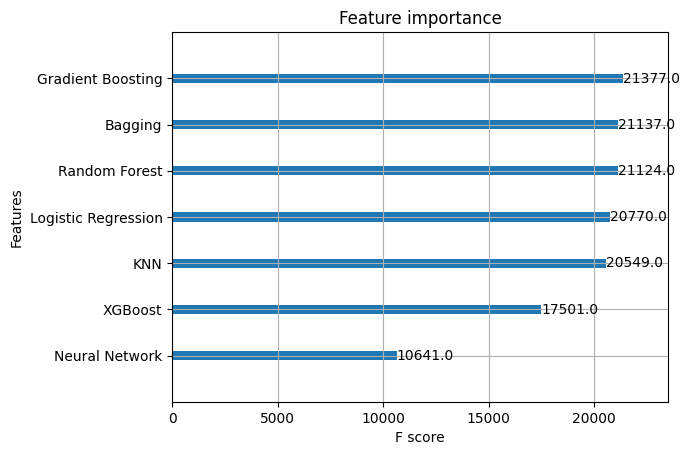

In [189]:
from xgboost import plot_importance

plot_importance(clf_fin, max_num_features=10)

# Submission

In [190]:
pred_lg_valid = clf_lg.predict(X_valid)
pred_knn_valid = clf_knn.predict(X_valid)
pred_rd_valid = clf_rd.predict(X_valid)
pred_bagg_valid = clf_bagg.predict(X_valid)
pred_gb_valid = clf_gb.predict(X_valid)
pred_xgb_valid = clf_xgb.predict(X_valid)
pred_nn_valid = clf_nn.predict(X_valid)

C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names,

In [191]:
# concatenate all pred
first_valid_predictions = pd.concat([pd.DataFrame(pred_lg_valid), pd.DataFrame(pred_knn_valid), pd.DataFrame(pred_rd_valid), pd.DataFrame(pred_bagg_valid), pd.DataFrame(pred_gb_valid), pd.DataFrame(pred_xgb_valid), pd.DataFrame(pred_nn_valid)], axis=1)
first_valid_predictions.columns = ['Logistic Regression', 'KNN', 'Random Forest', 'Bagging', 'Gradient Boosting', 'XGBoost', 'Neural Network']

In [192]:
y_final_pred = clf_fin.predict(first_valid_predictions)

In [201]:
y_final_pred = clf_xgb.predict(X_valid)

In [202]:
initial_data = pd.read_csv('./data/test.csv')
submission = pd.DataFrame([initial_data['Id'], y_final_pred]).T

In [203]:
submission.columns = ['Id', 'Predicted']
submission['Predicted'] = submission['Predicted'].map({0: 'Worst Concert Ever', 1: 'Did Not Enjoy', 2: 'Enjoyed', 3: 'Best Concert Ever'})

In [204]:
submission

,Id,Predicted
0,ConcertExperience_70055,Best Concert Ever
1,ConcertExperience_34799,Enjoyed
2,ConcertExperience_100410,Enjoyed
3,ConcertExperience_106446,Did Not Enjoy
4,ConcertExperience_127249,Did Not Enjoy
...,...,...
29995,ConcertExperience_82288,Did Not Enjoy
29996,ConcertExperience_27139,Did Not Enjoy
29997,ConcertExperience_197434,Enjoyed
29998,ConcertExperience_166029,Worst Concert Ever


In [205]:
submission.to_csv('./submissions/submission_fin2.csv', index=False)

In [200]:
# Analyse result
submission['Predicted'].value_counts() / submission.shape[0]

Enjoyed               0.453400
Did Not Enjoy         0.432333
Worst Concert Ever    0.063200
Best Concert Ever     0.051067
Name: Predicted, dtype: float64

In [136]:
analysis = pd.read_csv('./data/train.csv')
analysis['Concert Enjoyment'].value_counts() / analysis.shape[0]

Enjoyed               0.400153
Did Not Enjoy         0.399676
Best Concert Ever     0.100159
Worst Concert Ever    0.100012
Name: Concert Enjoyment, dtype: float64